In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split , GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from mlxtend.plotting import plot_confusion_matrix
#To turn off warning messages.
import warnings
warnings.filterwarnings('ignore')

In [81]:
# pip install -U scikit-learn

In [80]:
# pip install mlxtend

In [7]:
import plotly.express as px
import seaborn as sns

In [9]:
data=pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [11]:
data
df=pd.DataFrame(data)

In [13]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [19]:
#EDA
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

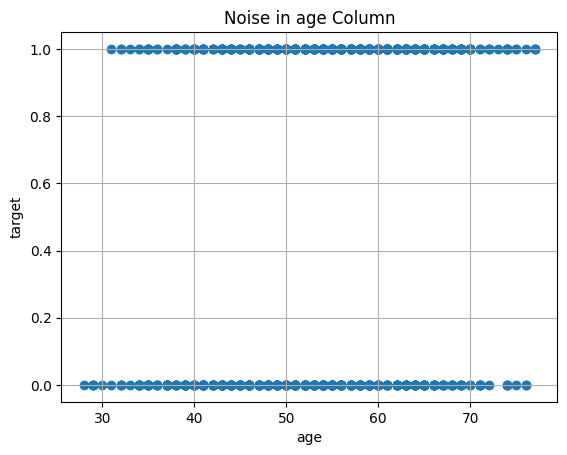

In [20]:
#noise detection 
plt.scatter(df['age'],df['target'])
plt.title(f'Noise in age Column' )
plt.xlabel('age')
plt.ylabel('target')
plt.grid()

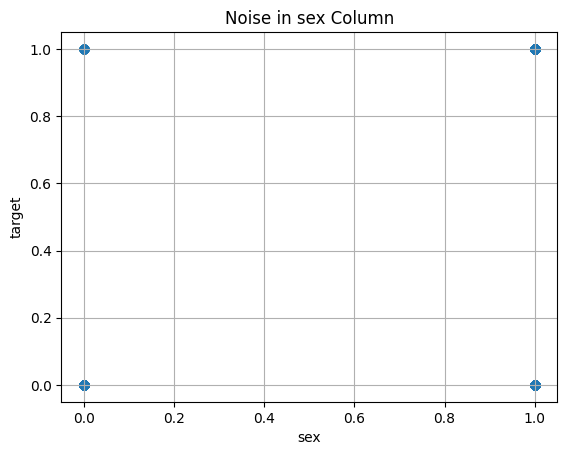

In [21]:
plt.scatter(df['sex'],df['target'])
plt.title(f'Noise in sex Column' )
plt.xlabel('sex')
plt.ylabel('target')
plt.grid()

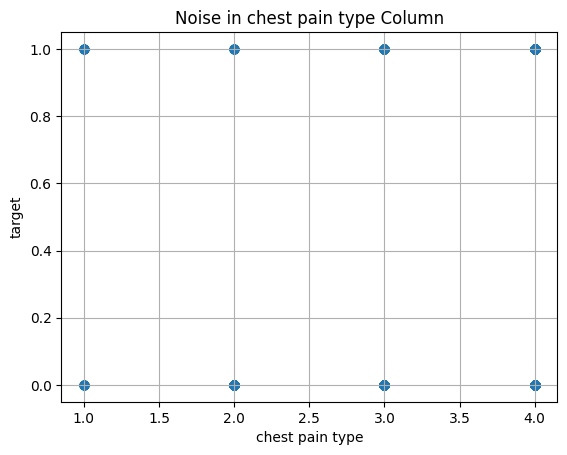

In [22]:
plt.scatter(df['chest pain type'],df['target'])
plt.title(f'Noise in chest pain type Column' )
plt.xlabel('chest pain type')
plt.ylabel('target')
plt.grid()

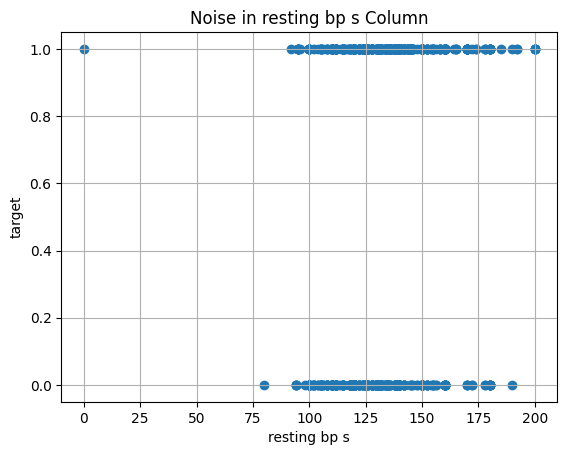

In [23]:
plt.scatter(df['resting bp s'],df['target'])
plt.title(f'Noise in resting bp s Column' )
plt.xlabel('resting bp s')
plt.ylabel('target')
plt.grid()

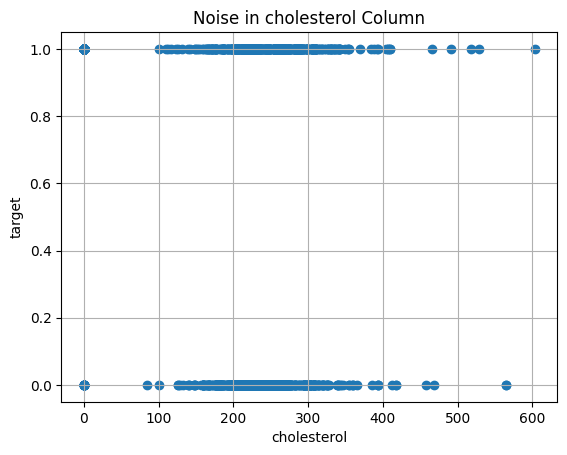

In [24]:
plt.scatter(df['cholesterol'],df['target'])
plt.title(f'Noise in cholesterol Column' )
plt.xlabel('cholesterol')
plt.ylabel('target')
plt.grid()

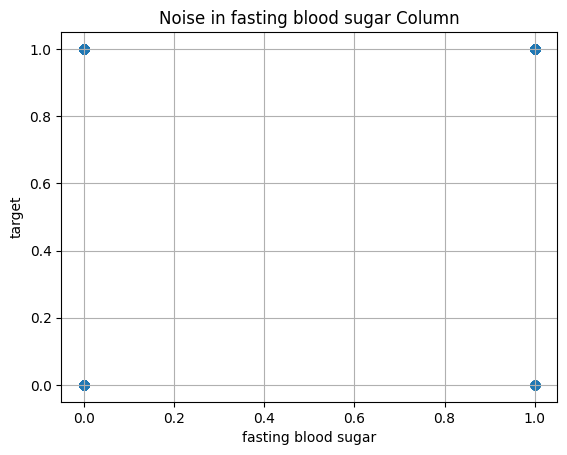

In [25]:
plt.scatter(df['fasting blood sugar'],df['target'])
plt.title(f'Noise in fasting blood sugar Column' )
plt.xlabel('fasting blood sugar')
plt.ylabel('target')
plt.grid()

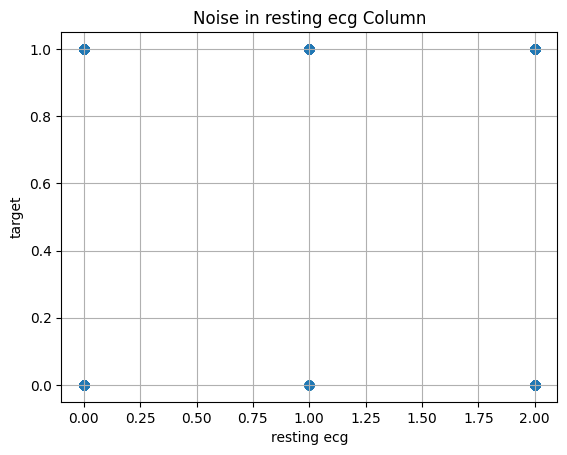

In [26]:
plt.scatter(df['resting ecg'],df['target'])
plt.title(f'Noise in resting ecg Column' )
plt.xlabel('resting ecg')
plt.ylabel('target')
plt.grid()

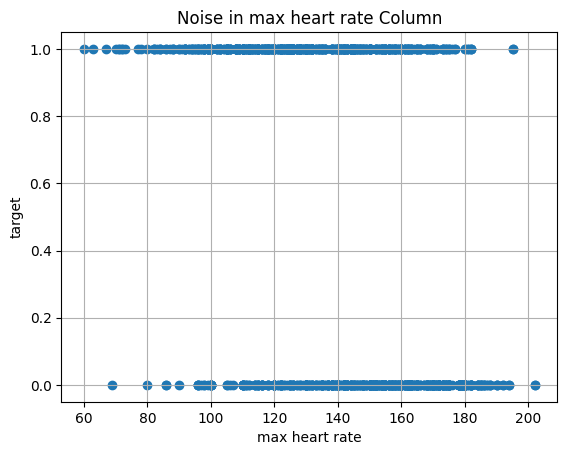

In [27]:
plt.scatter(df['max heart rate'],df['target'])
plt.title(f'Noise in max heart rate Column' )
plt.xlabel('max heart rate')
plt.ylabel('target')
plt.grid()

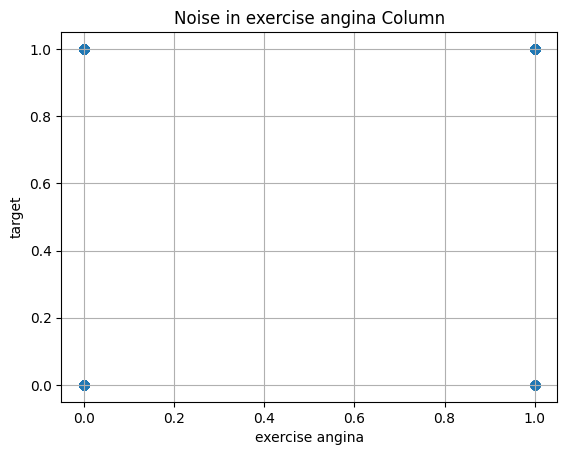

In [28]:
plt.scatter(df['exercise angina'],df['target'])
plt.title(f'Noise in exercise angina Column' )
plt.xlabel('exercise angina')
plt.ylabel('target')
plt.grid()

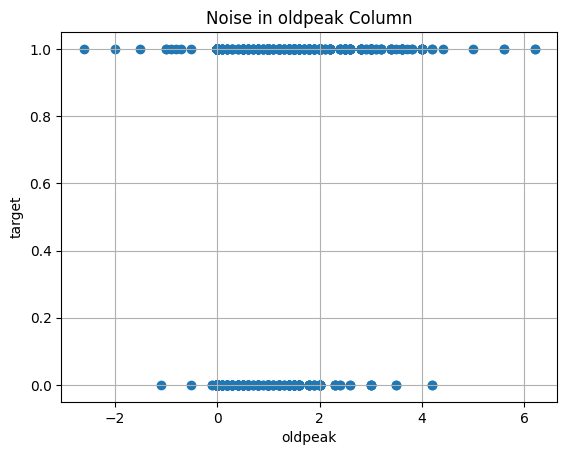

In [29]:
plt.scatter(df['oldpeak'],df['target'])
plt.title(f'Noise in oldpeak Column' )
plt.xlabel('oldpeak')
plt.ylabel('target')
plt.grid()

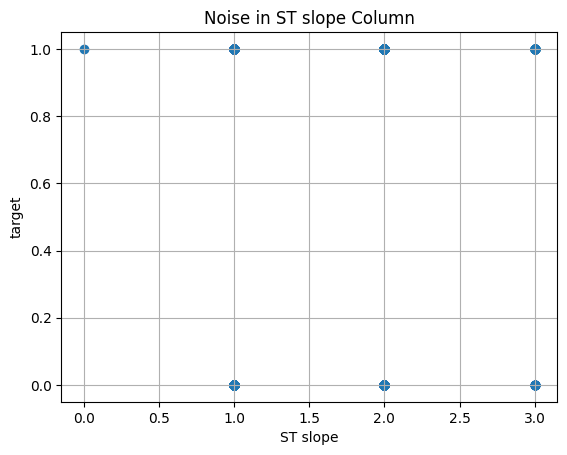

In [30]:
plt.scatter(df['ST slope'],df['target'])
plt.title(f'Noise in ST slope Column' )
plt.xlabel('ST slope')
plt.ylabel('target')
plt.grid()

In [31]:
df3=df[df['cholesterol']>0]
#Crestrol below zero has noise, that's why we remove these noises

In [32]:
df3.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,53.294695,0.734774,3.165029,132.571709,245.906680,0.162083,0.740668,142.730845,0.370334,0.939194,1.586444,0.468566
std,9.415441,0.441670,0.953323,17.451133,57.244599,0.368708,0.898779,24.511837,0.483131,1.093669,0.603898,0.499256
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,69.000000,0.000000,-0.100000,0.000000,0.000000
25%,46.000000,0.000000,2.000000,120.000000,209.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,240.000000,0.000000,0.000000,144.000000,0.000000,0.600000,2.000000,0.000000
75%,60.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,161.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [33]:
#The minimum age is 28 years and the maximum age is 77 years

#The lowest resting bp s is 92 and the highest is 200

#The lowest cholestoral value is 85 and the highest is 603

#The lowest value of the maximum heart rate is 69 and the highest is 202

In [57]:
for i in df3.columns:
    print (i,len(df[i].unique()))

age 50
sex 2
chest pain type 4
resting bp s 67
cholesterol 222
fasting blood sugar 2
resting ecg 3
max heart rate 119
exercise angina 2
oldpeak 53
ST slope 4
target 2


In [58]:
import matplotlib.pyplot as plt
matrix = df3.corr()
print(matrix)
#Creating and printing a correlation matrix


                          age       sex  chest pain type  resting bp s  \
age                  1.000000 -0.000812         0.154295      0.259836   
sex                 -0.000812  1.000000         0.115732      0.012293   
chest pain type      0.154295  0.115732         1.000000      0.021156   
resting bp s         0.259836  0.012293         0.021156      1.000000   
cholesterol          0.098634 -0.132119         0.083201      0.112951   
fasting blood sugar  0.209705  0.083098         0.007749      0.169577   
resting ecg          0.209592 -0.009957         0.077540      0.070335   
max heart rate      -0.368447 -0.147197        -0.331698     -0.110420   
exercise angina      0.205113  0.193492         0.422245      0.143969   
oldpeak              0.263868  0.112737         0.258610      0.202187   
ST slope             0.246093  0.115535         0.284335      0.141417   
target               0.274112  0.296594         0.450953      0.171239   

                     cholesterol  fas

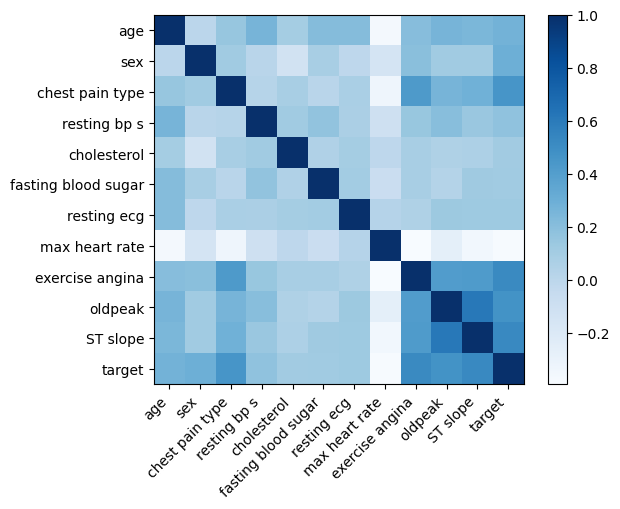

In [60]:
#plotting correlation matrix 
plt.imshow(matrix, cmap='Blues')

#adding colorbar 
plt.colorbar()

# Adding labels to the matrix
plt.xticks(range(len(matrix)), matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(matrix)), matrix.columns)
# Display the plot
plt.show()


In [47]:
#feature selectiojn 


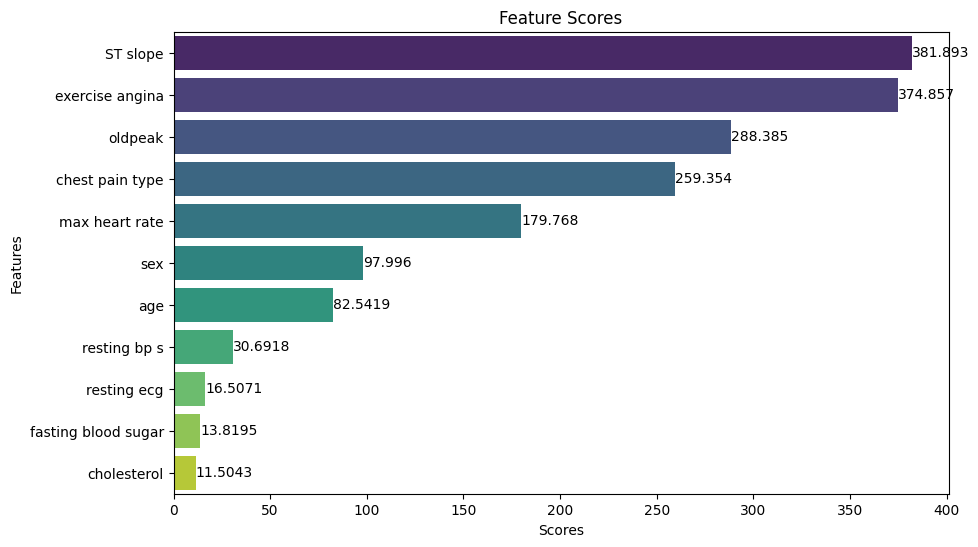

In [121]:
# Feature selection using SelectKBest with ANOVA F-value
X = df3.drop(["target"], axis = 1)  
y = df3["target"] 
selector = SelectKBest(f_classif, k=13)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

# Create a DataFrame to store the feature names and their scores
feature_scores_data_set = pd.DataFrame({'Features': selected_features, 'Scores': feature_scores})

# Sort the DataFrame by score in descending order
feature_scores_data_set = feature_scores_data_set.sort_values(by='Scores', ascending=False)

# Plot the feature scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Scores', y='Features', data=feature_scores_data_set, palette='viridis')
plt.title('Feature Scores')
plt.xlabel('Scores')
plt.ylabel('Features')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [123]:
X.columns
    

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope'],
      dtype='object')

In [124]:
feature_scores_data_set

,Features,Scores
10,ST slope,381.892684
8,exercise angina,374.856972
9,oldpeak,288.385148
2,chest pain type,259.354259
7,max heart rate,179.767506
1,sex,97.995976
0,age,82.541863
3,resting bp s,30.691819
6,resting ecg,16.507098
5,fasting blood sugar,13.819509


[0.07921475 0.06022085 0.13228648 0.0786383  0.07213707 0.01945442
 0.04165079 0.09256999 0.13637985 0.11283765 0.17460986]


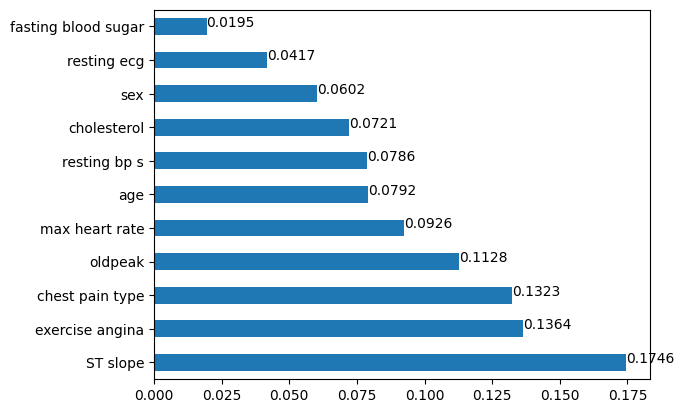

In [125]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)


print(model.feature_importances_)


feat_importances = pd.Series(model.feature_importances_, index=X.columns)


feat_importances.nlargest(13).plot(kind='barh')


for index, value in enumerate(feat_importances.nlargest(13)):
    plt.text(value, index, str(round(value, 4)))


plt.show()

In [126]:

# print (X)
X = X.drop(["fasting blood sugar", "resting ecg", "cholesterol"], axis = 1)

In [127]:
X.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope'],
      dtype='object')

In [128]:
#Scale all values for good Accuracy
sc = StandardScaler()
col = ['age', 'sex', 'chest pain type', 'resting bp s', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope']
X[col] = sc.fit_transform(X[col])
X.head()

,age,sex,chest pain type,resting bp s,max heart rate,exercise angina,oldpeak,ST slope
0,-1.412704,0.600802,-1.222673,0.425872,1.194669,-0.766905,-0.859178,-0.971575
1,-0.456357,-1.664443,-0.173195,1.572492,0.541603,-0.766905,0.055625,0.685147
2,-1.731486,0.600802,-1.222673,-0.147439,-1.825764,-0.766905,-0.859178,-0.971575
3,-0.562618,-1.664443,0.876283,0.311210,-1.417597,1.303942,0.513026,0.685147
4,0.074946,0.600802,-0.173195,0.999182,-0.846164,-0.766905,-0.859178,-0.971575


In [129]:
# asdfa